<a href="https://colab.research.google.com/github/SATISH-1711/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required modules
import pandas as pd
import numpy as np
import sklearn

In [2]:
#importing data from data file
df=pd.read_csv("heart.csv")

In [3]:
#displaying the data
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#Displaying columns of data
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1020,True
1021,True
1022,True
1023,True


In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
# Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Display first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# Statistical summary
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Check class balance
df['target'].value_counts()



,count
target,
1,526
0,499


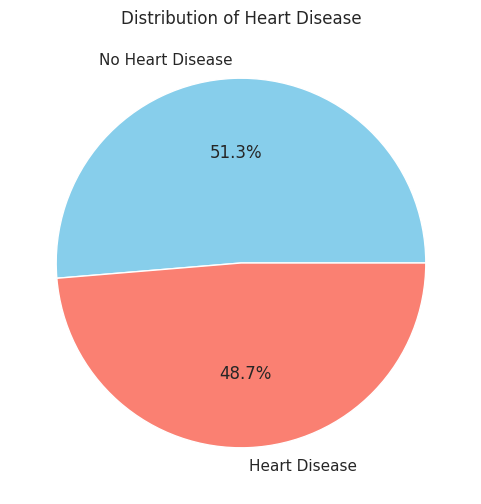

In [12]:
# Pie chart for target variable
plt.figure(figsize=(6,6))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Heart Disease', 'Heart Disease'], colors=['skyblue','salmon'])
plt.title('Distribution of Heart Disease')
plt.ylabel('')
plt.show()



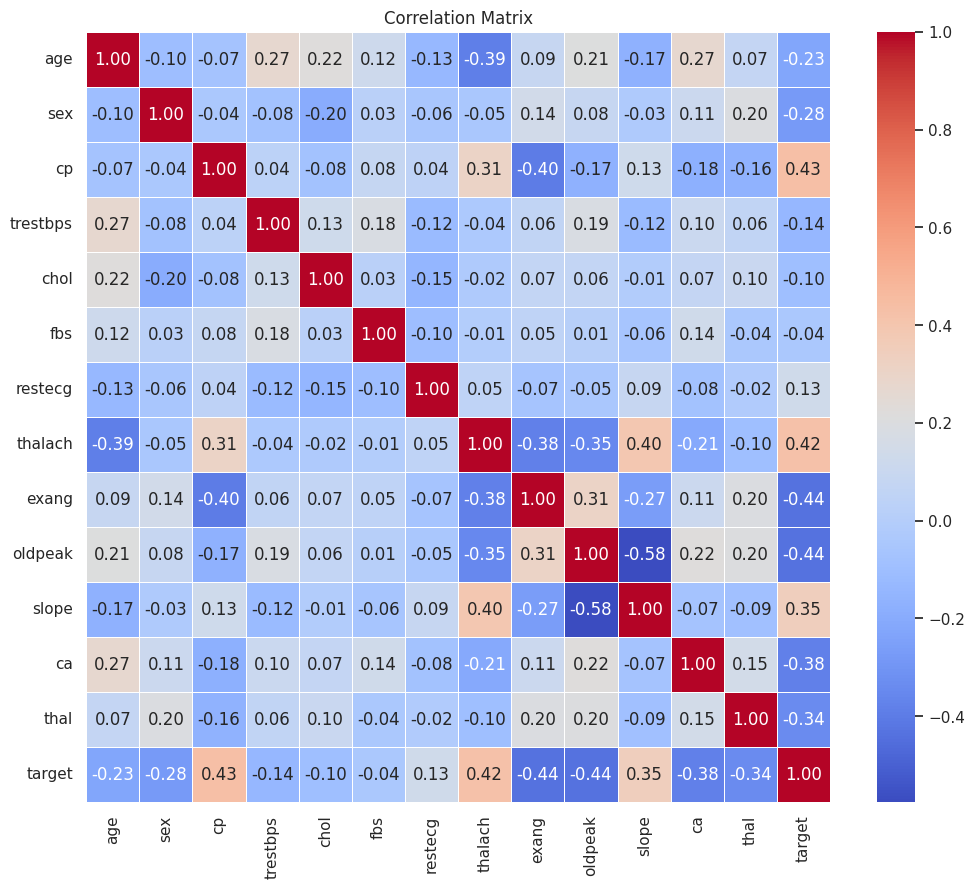

In [13]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



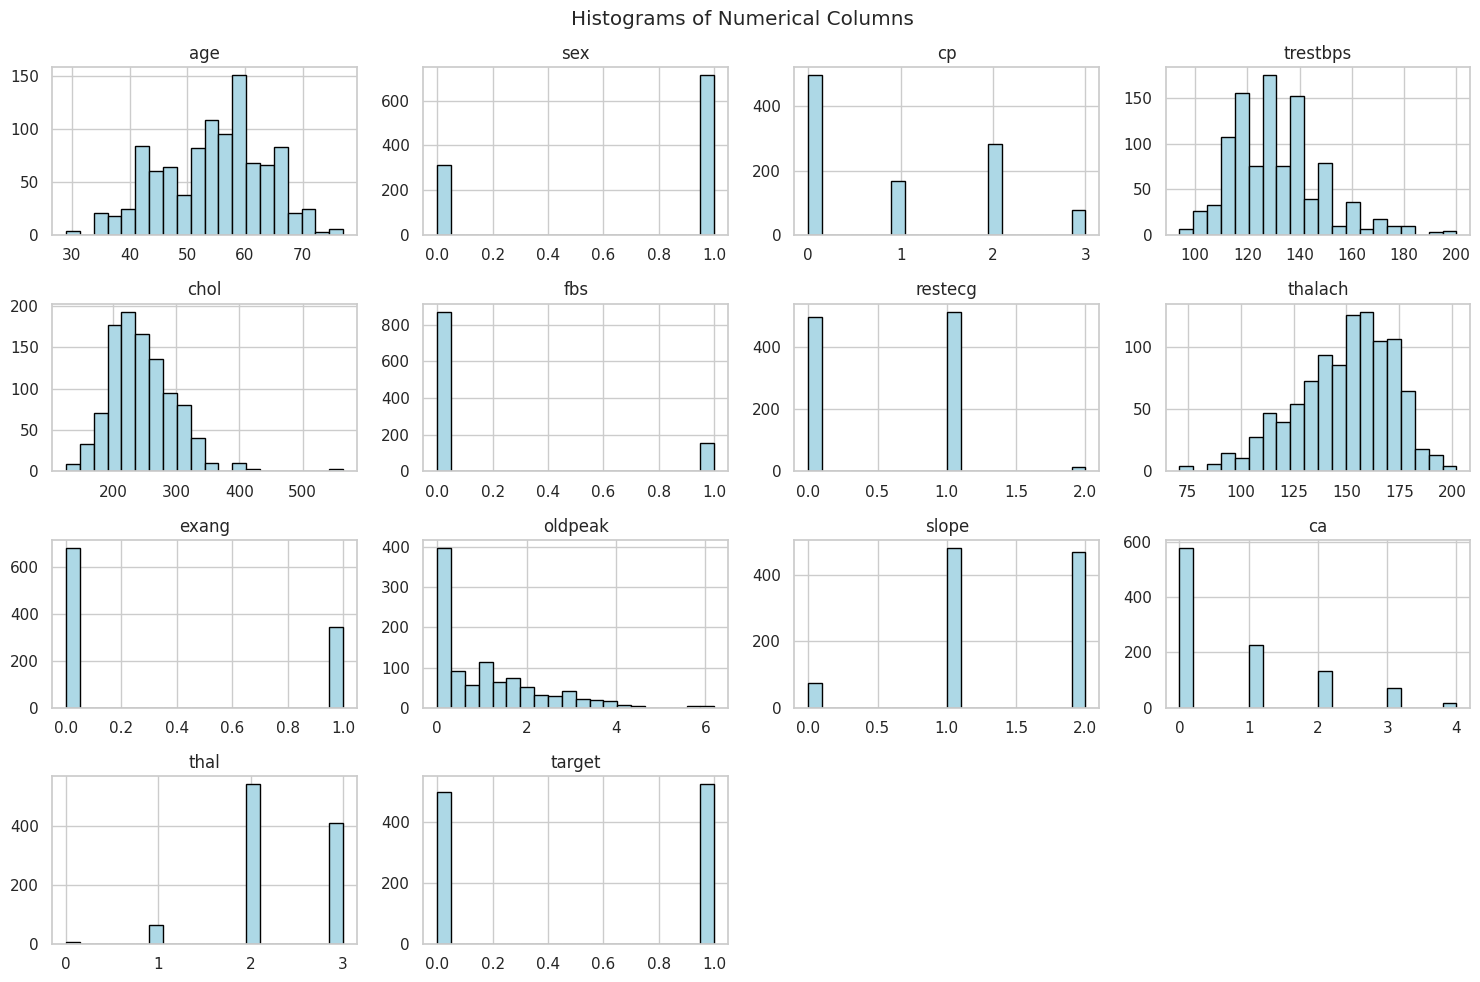

In [14]:
# Histogram for each numerical feature
df.hist(figsize=(15, 10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.tight_layout()
plt.show()



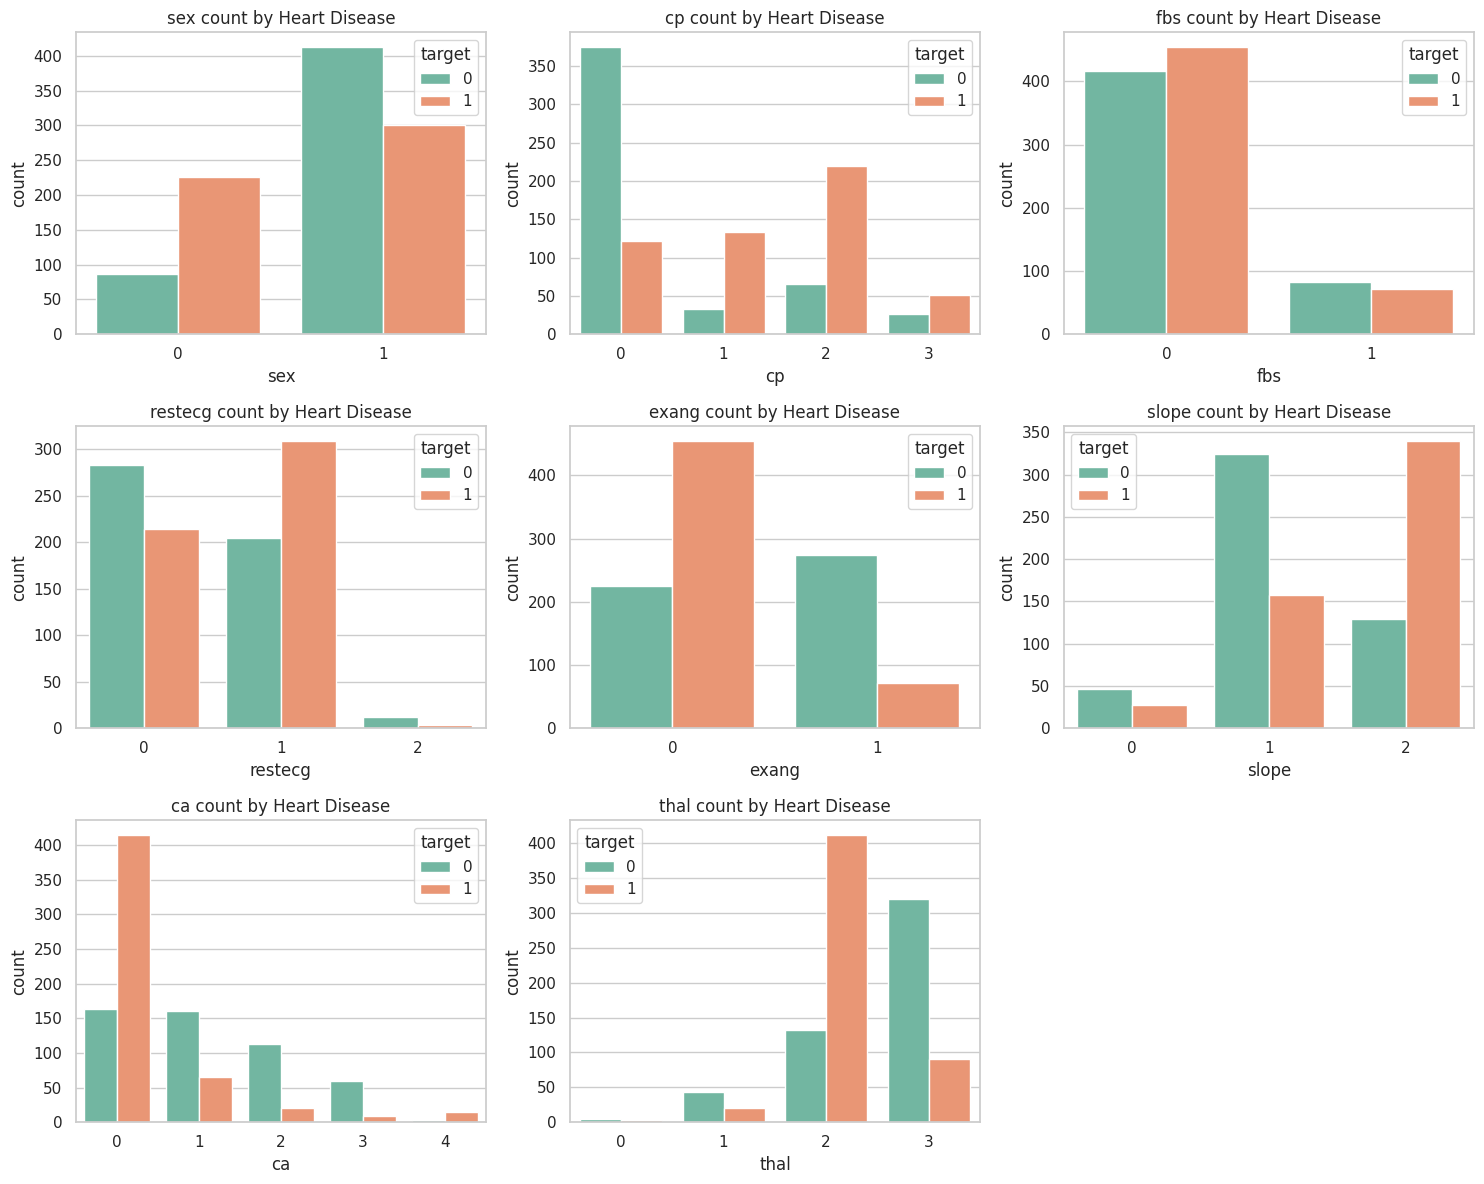

In [15]:
# Count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=feature, palette='Set2', hue='target')
    plt.title(f'{feature} count by Heart Disease')
plt.tight_layout()
plt.show()


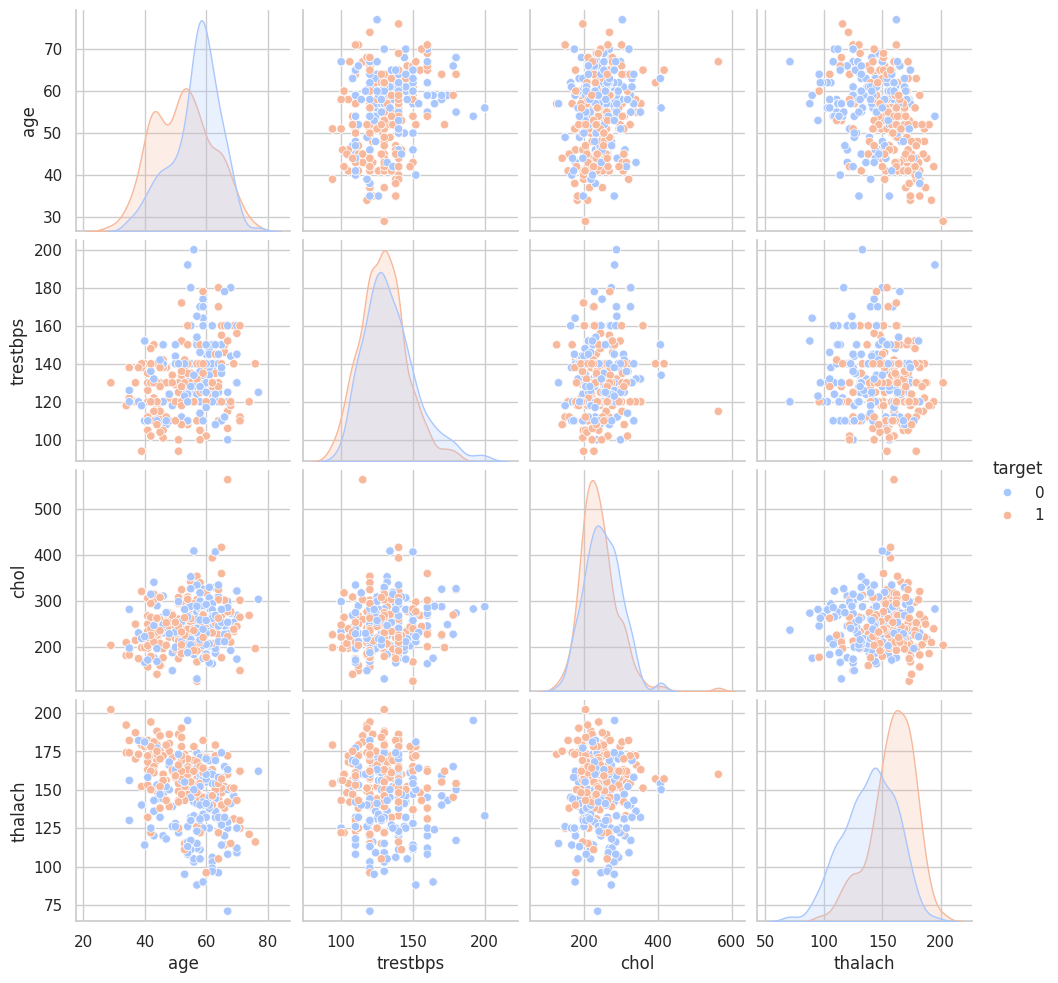

In [16]:

# Pair plot for selected features
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target', palette='coolwarm')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



#  Identify categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

#  One-hot encode categorical columns
#df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# . Feature-target split
X = df.drop(['target'], axis=1)
y = df['target']

# . Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Feature scaling
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Final shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (820, 13)
Test set shape: (205, 13)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Create and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

#  Make predictions
y_pred = model.predict(X_test)

#  Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8146341463414634

Confusion Matrix:
 [[70 30]
 [ 8 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

#  Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=13,criterion='gini',random_state=42)
dt_model.fit(X_train, y_train)

#  Make predictions
y_pred_dt = dt_model.predict(X_test)

#  Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Confusion Matrix:
 [[100   0]
 [  3 102]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



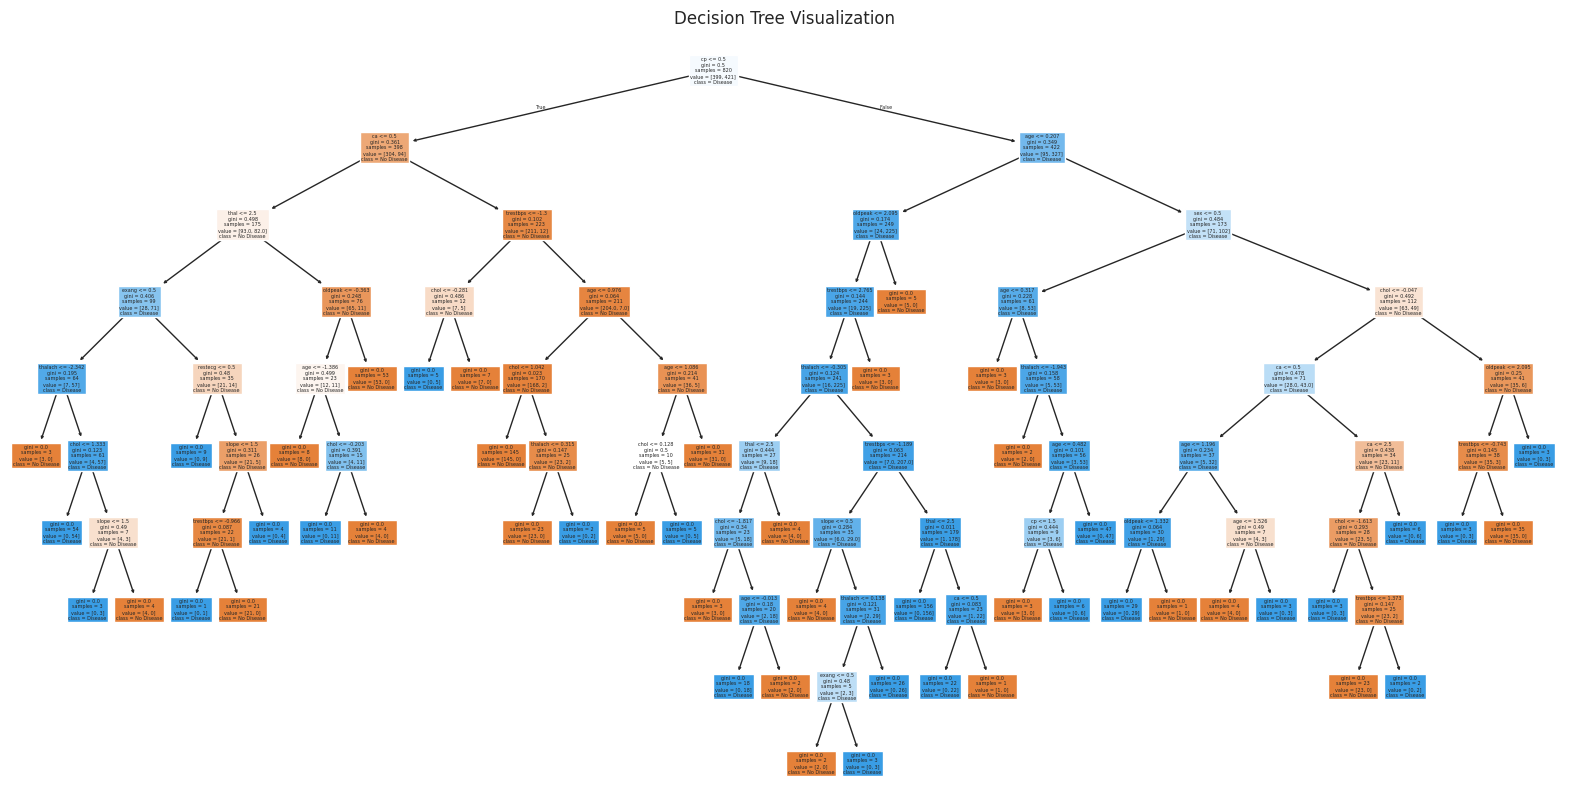

In [21]:
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree Visualization")
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#  Train the model
rf_model.fit(X_train, y_train)

#  Make predictions
y_pred_rf = rf_model.predict(X_test)

#  Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Confusion Matrix:
 [[100   0]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Initialize the SVM model (with default RBF kernel)
svm_model = SVC(kernel='rbf', random_state=42)

# . Train the model
svm_model.fit(X_train, y_train)

#  Make predictions
y_pred_svm = svm_model.predict(X_test)

#  Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8878048780487805

Confusion Matrix:
 [[85 15]
 [ 8 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       100
           1       0.87      0.92      0.89       105

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different k values

#  Train the model
knn_model.fit(X_train, y_train)

#  Make predictions
y_pred_knn = knn_model.predict(X_test)

#  Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8536585365853658

Confusion Matrix:
 [[85 15]
 [15 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       100
           1       0.86      0.86      0.86       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



<ipython-input-30-4ddc3e966b66>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Set2')


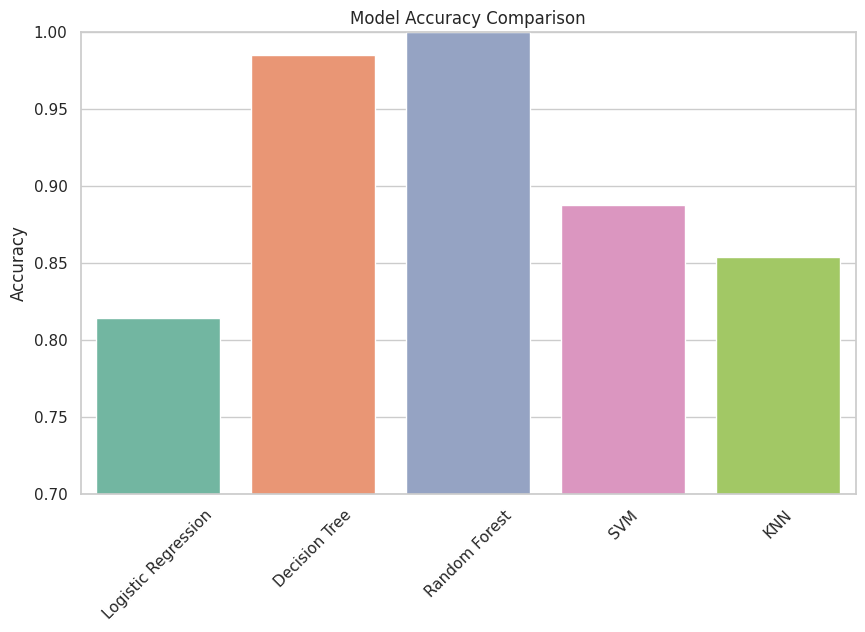

In [30]:
# Example model accuracy comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred),        # Logistic Regression
    accuracy_score(y_test, y_pred_dt),     # Decision Tree
    accuracy_score(y_test, y_pred_rf),     # Random Forest
    accuracy_score(y_test, y_pred_svm),    # SVM
    accuracy_score(y_test, y_pred_knn)     # KNN
]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='Set2')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()


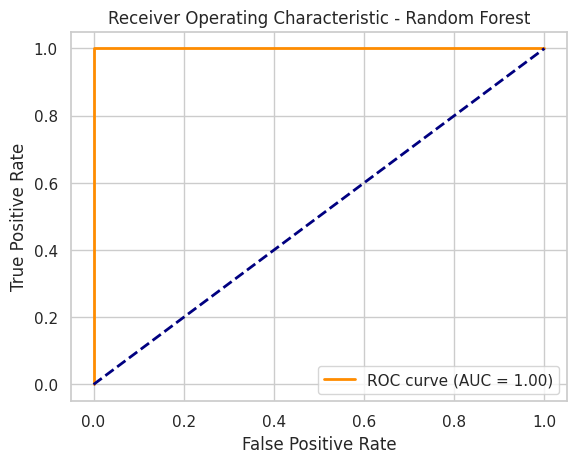

In [31]:
from sklearn.metrics import roc_curve, auc

# For example, for Random Forest:
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [33]:
#prediction or deployment
import numpy as np

# Example new patient input :
# ['age', 'sex', 'cp', 'trestbps', 'chol',  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
new_data_raw = [25, 0, 0, 140,268,0,2,156,0,1.5, 2, 1, 0]

# Convert to DataFrame with same columns
input_df = pd.DataFrame([new_data_raw], columns=X.columns)

# Scale numerical features with same scaler used on training data
input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

# Predict
prediction = rf_model.predict(input_df)

# Output
if prediction[0] >=0.95:
    print("*******#  ⚠️ High risk of heart disease   #********")
else:
    print("*******#   ✅ Low risk of heart disease    #********")


*******#  ⚠️ High risk of heart disease   #********
